# Project Title
---

Group Name

Team members:
- Name
- Name
- Name

## Introduction 
__Introduction to the topic__ 

    ...

---

## Problem Statement

    ...

## Objectives:
__Questions that will guide the analysis to solve the problem__

    ...

---

## Exploratory Data Analysis (EDA):

### Data Info:
__Getting the data and exploring it (includes descriptive statistics)__

In [2]:
# import and load data

import pandas as pd
gni_path =  "world-development-statistics\gni_per_cap_atlas_method_con2021.csv"
population_path ="world-development-statistics\population.csv"
life_path ="world-development-statistics\life_expectancy.csv"

gni_df = pd.read_csv(gni_path)
life_df = pd.read_csv(life_path)
population_df  = pd.read_csv(population_path)



In [3]:
# gni_df cleaning

gni_clean = gni_df.drop(columns=[str(x) for x in range(1800,1920)])
gni_clean.drop(columns=[str(x) for x in range(2035,2051)], inplace=True)
gni_clean = gni_clean[gni_clean["country"] != "Liechtenstein"]

gni_clean.dtypes
gni_clean["1920"].unique()

def to_int(input1):
    """convert string (like 12k, 13.4k) to int """
    if "k" in input1:
        return int(float(input1[:-1]) * 1000)
    elif "M" in input1:
        return int(float(input1[:-1]) * 1_000_000)
    elif "B" in input1:
        return int(float(input1[:-1]) * 1_000_000_000)
    else:
        return(int(value))
    
for column in gni_clean.columns  :
    if column == "country":
        continue
    if gni_clean[column].astype(str).str.contains("k").any():
        result = []
        for value in gni_clean[column]:
            result.append(to_int(value))
        gni_clean[column] = result
        print(column,"converted to int")

print("number of empty cells =", gni_clean.isnull().sum().sum())


1920 converted to int
1921 converted to int
1922 converted to int
1923 converted to int
1924 converted to int
1925 converted to int
1926 converted to int
1927 converted to int
1928 converted to int
1929 converted to int
1930 converted to int
1931 converted to int
1932 converted to int
1933 converted to int
1934 converted to int
1935 converted to int
1936 converted to int
1937 converted to int
1938 converted to int
1939 converted to int
1940 converted to int
1941 converted to int
1942 converted to int
1943 converted to int
1944 converted to int
1945 converted to int
1946 converted to int
1947 converted to int
1948 converted to int
1949 converted to int
1950 converted to int
1951 converted to int
1952 converted to int
1953 converted to int
1954 converted to int
1955 converted to int
1956 converted to int
1957 converted to int
1958 converted to int
1959 converted to int
1960 converted to int
1961 converted to int
1962 converted to int
1963 converted to int
1964 converted to int
1965 conve

In [ ]:
population_clean = population_df[population_df["country"] != "Holy See"]

population_clean[population_clean.isnull().any(axis=1)]


# for x in (population_clean[population_clean["country"] == "Holy See"].to_dict()): print(x,(population_clean[population_clean["country"] == "Holy See"].to_dict())[x] )
for column in population_clean.columns  :
    if column == "country":
        continue
    if population_clean[column].astype(str).str.contains("k").any() or True:
        result = []
        for value in population_clean[column]:
            result.append(to_int(value))
        # print(result)
        population_clean.loc[:,column] = result
        population_clean.loc[:,column] = population_clean[column].astype(int)
        print(column,"converted to int")

population_clean["1800"].unique()

1800 converted to int
1801 converted to int
1802 converted to int
1803 converted to int
1804 converted to int
1805 converted to int
1806 converted to int
1807 converted to int
1808 converted to int
1809 converted to int
1810 converted to int
1811 converted to int
1812 converted to int
1813 converted to int
1814 converted to int
1815 converted to int
1816 converted to int
1817 converted to int
1818 converted to int
1819 converted to int
1820 converted to int
1821 converted to int
1822 converted to int
1823 converted to int
1824 converted to int
1825 converted to int
1826 converted to int
1827 converted to int
1828 converted to int
1829 converted to int
1830 converted to int
1831 converted to int
1832 converted to int
1833 converted to int
1834 converted to int
1835 converted to int
1836 converted to int
1837 converted to int
1838 converted to int
1839 converted to int
1840 converted to int
1841 converted to int
1842 converted to int
1843 converted to int
1844 converted to int
1845 conve

array([3280000, 1570000, 400000, 2650, 40200, 534000, 413000, 37000,
       200000, 3000000, 880000, 899000, 3250000, 637000, 1670000,
       19200000, 2250000, 64500, 27400, 852000, 2360000, 25500, 887000,
       2500000, 81700, 2260, 392000, 121000, 479000, 500000, 1750000,
       771000, 330000000, 1090000, 1860000, 5160000, 314000, 1210000,
       56300, 55700, 53000, 272000, 184000, 5520000, 18000000, 22800,
       19900, 1000000, 150000, 3500000, 205000, 11500000, 334000,
       12000000, 800000, 131000, 29000000, 16400, 158000, 10800000,
       1070000, 2020000, 984000, 103000, 218000, 80400, 29400, 463000,
       166000, 20000, 130000, 1230000, 16100000, 201000000, 5250000,
       6000000, 61400, 210000, 19000000, 300000, 28000000, 2040000,
       2570000, 530000, 2089999, 17900, 17200, 9390000, 81300, 470000,
       230000, 24000, 5800, 276000, 779000, 127000, 591000, 7790, 713000,
       1500000, 42400, 5100000, 5830, 1400000, 134000, 600000, 2000000,
       383000, 59000, 73

In [5]:
life_df
    



,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,79.8,79.9,80.0,80.1,80.3,80.4,80.5,80.6,80.7,80.8
191,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,76.9,77.0,77.1,77.3,77.4,77.5,77.6,77.8,77.9,78.0
192,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.4,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7
193,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,75.8,76.0,76.1,76.3,76.4,76.5,76.7,76.8,77.0,77.1


In [ ]:
gni_clean.me

,country,1920,1921,1922,1923,1924,1925,1926,1927,1928,...,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034
0,Afghanistan,366,368,371,373,376,378,380,382,384,...,548,557,567,577,587,598,610,622,635,648
1,Angola,675,693,711,730,749,769,789,809,830,...,2120,2130,2150,2170,2190,2220,2260,2300,2340,2390
2,Albania,436,440,444,447,451,455,458,462,466,...,6390,6620,6860,7090,7320,7530,7730,7930,8110,8290
3,United Arab Emirates,7280,8130,9080,9550,10000,10500,10900,11300,11700,...,38700,38500,38400,38400,38500,38900,39300,39900,40600,41400
4,Argentina,2960,2960,3100,3320,3460,3340,3410,3540,3660,...,9880,9930,9990,10100,10200,10300,10500,10700,10900,11100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Samoa,559,566,573,579,586,593,600,607,614,...,3970,4020,4070,4130,4190,4260,4340,4420,4510,4600
187,Yemen,277,278,278,279,280,281,281,282,283,...,969,1000,1030,1070,1100,1130,1160,1180,1210,1240
188,South Africa,1180,1210,1240,1260,1290,1390,1440,1470,1600,...,6100,6080,6080,6090,6120,6180,6260,6350,6470,6600
189,Zambia,315,318,320,323,325,327,329,331,333,...,1060,1050,1040,1030,1030,1030,1040,1050,1070,1090


### Data Handling: 
__Cleaning, transforming, and combining data__

### Analysis: 
__Answering the objectives through data analysis__



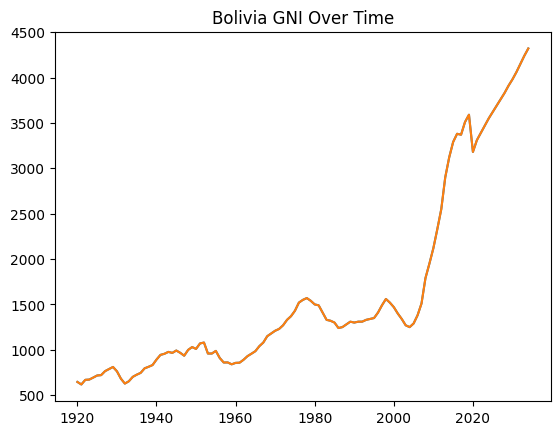

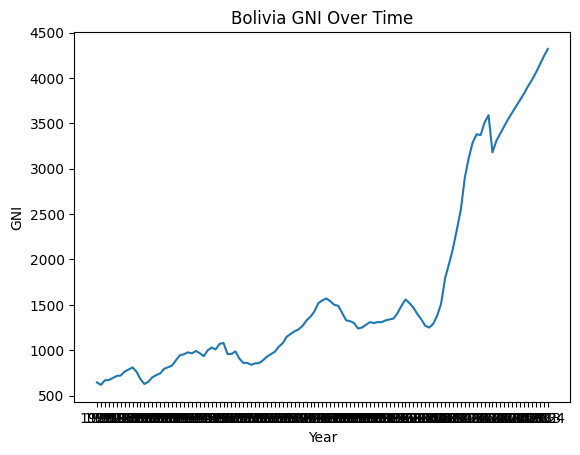

In [36]:
# gni_clean[gni_clean["country"]=="Bolivia"].T
bolivia_gni = gni_clean[gni_clean["country"] == "Bolivia"].drop("country", axis=1).T
bolivia_gni.columns = ["GNI"]
bolivia_gni.plot(kind="line", legend=False, title="Bolivia GNI Over Time")

bolivia_row = gni_clean[gni_clean["country"] == "Bolivia"].drop("country", axis=1)
years = bolivia_row.columns

gni_values = bolivia_row.iloc[0].values

import matplotlib.pyplot as plt
plt.plot(years, gni_values)
plt.show()
plt.plot(years, gni_values)
plt.title("Bolivia GNI Over Time")
plt.xlabel("Year")
plt.ylabel("GNI")
# plt.xticks(rotation=90)
plt.show()

In [55]:
gni_long = gni_clean.melt(id_vars="country", var_name="year", value_name="GNI")
gni_long

,country,year,GNI
0,Afghanistan,1920,366
1,Angola,1920,675
2,Albania,1920,436
3,United Arab Emirates,1920,7280
4,Argentina,1920,2960
...,...,...,...
21845,Samoa,2034,4600
21846,Yemen,2034,1240
21847,South Africa,2034,6600
21848,Zambia,2034,1090


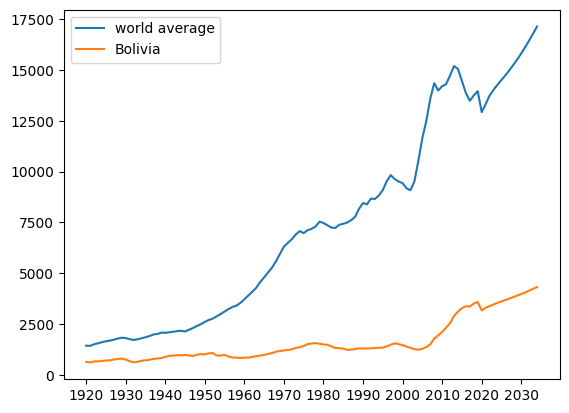

In [ ]:
years=gni_clean.drop(columns="country").columns
y=gni_clean.drop(columns="country").mean()
plt.plot(x,y, label="world average")
plt.xticks(x[::10])
plt.plot(years, bolivia_gni, label="Bolivia")
plt.legend()

---

## Summary
__Summarizing the key insights from the analysis__

**Note**: _Use Bullet Points_

    ...

## Recommendations/Conclusion
**Note**: _Use Bullet Points_

    ...